#### Principal Component Analysis (PCA) in Machine Learning

In machine learning, **PCA (Principal Component Analysis)** is a dimensionality reduction technique that transforms a large set of variables in a dataset into a smaller set of "principal components." These principal components capture most of the important information within the original data, enabling easier analysis and visualization while minimizing information loss. 

Essentially, PCA simplifies complex data by reducing the number of features while retaining key patterns and trends. It is commonly used in preprocessing steps, especially when dealing with high-dimensional data, and helps to improve the efficiency of models and algorithms.


In [2]:
# Import the load_digits dataset from the sklearn.datasets module
from sklearn.datasets import load_digits

# Import pandas library and alias it as pd for ease of use
import pandas as pd

# Import numpy library and alias it as np for ease of use
import numpy as np


###  Load the digits dataset 

In [3]:
# Load the digits dataset from sklearn and store it in the variable 'dataset'
dataset = load_digits()


In [4]:
# Retrieve and display the keys of the dataset dictionary
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
# Display the entire contents of the dataset
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [45]:
# Import pandas library as pd
import pandas as pd

# Create a DataFrame 'df' using data from 'dataset.data' and column names from 'dataset.feature_names'
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [46]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [47]:
# Assign the target variable (labels) from the dataset to the variable 'y'
y = dataset.target

In [48]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [49]:
# Import the 'pyplot' module from the 'matplotlib' library, which is used for creating visualizations
from matplotlib import pyplot as plt

# Assign the features (data) from the dataset to the variable 'x'
x = dataset.data

In [51]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

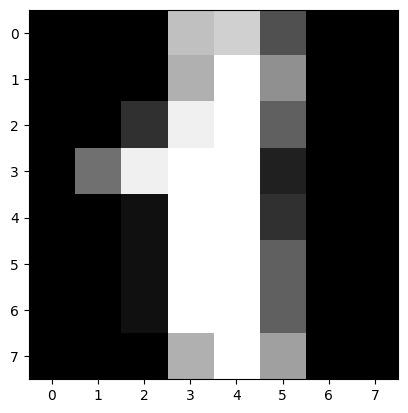

In [52]:
# Display the second sample in the dataset as an image
# 'x[1]' accesses the second sample, which is reshaped into an 8x8 grid (assuming the data represents 8x8 pixel images)
# 'cmap="gray"' sets the color map to grayscale for the image display
plt.imshow(x[1].reshape(8, 8), cmap='gray')

In [53]:
# Import the StandardScaler class from sklearn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler, which standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Apply the scaler to the DataFrame 'df' to normalize the feature data
# The 'fit_transform' method computes the mean and standard deviation for scaling, and then applies the transformation
x_normalized = scaler.fit_transform(df)

In [55]:
x_normalized

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [56]:
# Import the train_test_split function from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Split the normalized feature data (x_normalized) and target variable (y) into training and test sets
# 'test_size=0.1' specifies that 10% of the data will be used for testing
# 'random_state=30' ensures reproducibility by setting a fixed seed for random splitting
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.1, random_state=30)

In [57]:
# Import the LogisticRegression class from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
# This model will be used for classification tasks based on the logistic regression algorithm
model = LogisticRegression()

In [58]:
# Train the LogisticRegression model using the training data
# 'x_train' contains the training features, and 'y_train' contains the corresponding target labels
# The fit() method adjusts the model parameters to best fit the training data
model.fit(x_train, y_train)

LogisticRegression()

In [59]:
x_test

array([[ 0.        , -0.33501649,  0.16729015, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.45060282, -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.8876023 ,
         0.47246651, -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.25345218, ...,  0.03999823,
        -0.26113572, -0.19600752],
       [ 0.        ,  1.87020193,  1.21914597, ..., -0.29904339,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.46382335, ...,  1.22664392,
         0.47246651, -0.19600752]])

In [61]:
# Use the trained LogisticRegression model to make predictions on the test data
# 'x_test' contains the features of the test dataset
# The predict() method generates the predicted target labels for the test data
y_pred = model.predict(x_test)

In [62]:
# Evaluate the performance of the trained LogisticRegression model on the test data
# 'x_test' contains the test features, and 'y_test' contains the true labels for the test set
# The score() method computes the accuracy of the model, which is the proportion of correct predictions
model.score(x_test, y_test)


0.9611111111111111

#### To apply Principal Component Analysis (PCA) for dimensionality reduction

In [25]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [63]:
# Import the PCA (Principal Component Analysis) class from sklearn's decomposition module
from sklearn.decomposition import PCA

# Create an instance of the PCA class with 'n_components=2'
# This reduces the data to 2 principal components (2D), which helps in visualizing high-dimensional data
pca = PCA(n_components=2)

In [64]:
# Apply PCA transformation to the data 'x'
# 'fit_transform()' first fits the PCA model to the data and then transforms it into the lower-dimensional space
# The transformed data is stored in 'x_transformed', which now has reduced dimensions (2 in this case)
x_transformed = pca.fit_transform(x)

In [65]:
x_transformed.shape

(1797, 2)

In [66]:
# Split the transformed data (x_transformed) and the target labels (y) into training and testing sets
# 'test_size=0.1' means 10% of the data will be allocated to the test set, and 90% to the training set
# 'random_state=30' ensures reproducibility by setting a fixed seed for the random splitting of data
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.1, random_state=30)

In [67]:
x_train.shape

(1617, 2)

In [68]:
# Create an instance of the LogisticRegression model
# This model will be used for classification tasks to predict categorical outcomes
# It is initialized with default hyperparameters
model = LogisticRegression()

In [69]:
# Train the LogisticRegression model using the training data
# 'x_train' contains the training features, and 'y_train' contains the corresponding target labels
# The fit() method adjusts the model's parameters based on the training data to learn the relationship between features and labels
model.fit(x_train, y_train)

d:\Text-Generation-With-LSTM\genv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
# Evaluate the performance of the trained LogisticRegression model on the test data
# 'x_test' contains the features (input data) of the test set
# 'y_test' contains the true target labels (output data) for the test set
# The score() method calculates the accuracy of the model by comparing the predicted labels to the actual labels
model.score(x_test, y_test)

0.5777777777777777

In [72]:
# Create an instance of the PCA (Principal Component Analysis) class
# 'n_components=0.95' means the PCA will retain enough principal components to explain 95% of the variance in the data
# This is a common technique for reducing dimensionality while preserving most of the original data's variance
pca = PCA(0.95)


In [73]:
x_transformed = pca.fit_transform(x)

In [74]:
x_transformed.shape

(1797, 29)

In [75]:
x_transformed

array([[ -1.25946645, -21.27488348,   9.46305462, ...,   3.67072108,
          0.9436689 ,   1.13250195],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   2.18261819,
          0.51022719,  -2.31354911],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   4.22882114,
         -2.1576573 ,  -0.8379578 ],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -3.56866194,
         -1.82444444,  -3.53885886],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   3.25330054,
         -0.95484174,   0.93895602],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -3.01636722,
         -1.29752723,  -2.58810313]])

In [76]:
x_train, x_test, y_tain,y_test=train_test_split(x_transformed, y, test_size=0.1, random_state=30)

In [77]:
model1 = LogisticRegression()

In [78]:
model1.fit(x_train, y_tain)

d:\Text-Generation-With-LSTM\genv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
model1.score(x_test, y_test)

0.9611111111111111